In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [3]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\test case data analyst.xlsx - raw data.csv')
print(data.purchase_date.max())
data.purchase_date = pd.to_datetime(data.purchase_date)

2/9/2020


In [4]:
data.is_trial_period = data.is_trial_period.astype('category')
data.is_trial_period = data.is_trial_period.cat.codes
data = data.sort_values('purchase_date')
users = set()
sum_per_day = [0] * 300
pointer = 1
k = 0
ltv = []
max(data.purchase_date)
unique_dates = sorted(data['purchase_date'].dt.date.unique())
total_revenue = 0

In [5]:
last_date = data.purchase_date[0]
for i in data.purchase_date:
    if i != last_date:
        if len(users) > 0:
            ltv.append(sum_per_day[pointer] / len(users))
        pointer += 1
        sum_per_day[pointer] = sum_per_day[pointer - 1]
        last_date = i
    if data.at[k, 'is_trial_period'] != 0:
        sum_per_day[pointer] += 4.99
    users.add(data.at[k, 'user_id'])
    k += 1
ltv.append(sum_per_day[pointer] / len(users))
ltv

[0.0,
 0.0,
 0.7425965130759615,
 1.4700361745421227,
 1.93442990984614,
 2.2439308176099786,
 2.5452392782427258,
 2.926020613937094,
 3.1559191212213995,
 3.2989941131304685,
 3.462239726027354,
 3.6161698048611055,
 3.7135100037277002,
 3.8349230856234384,
 3.829286013181259,
 3.874808785281134,
 3.9279960916688266,
 3.9285773376795006,
 3.8740953404172003,
 3.901286369447087,
 3.9198209810253273,
 3.909604475315373,
 3.9381535398390546,
 3.9334940556921385,
 3.942449998470323,
 3.969692357995881,
 3.9961715191711145,
 4.036772793054491,
 4.031305260289687,
 4.0877519911391795,
 4.1288813940416755,
 4.148478576071071,
 4.206630426868764,
 4.258688640542452,
 4.280602768852914,
 4.330372681961849,
 4.381849204265709,
 4.430435496596578,
 4.465314332382031,
 4.499289787345797,
 4.559560071413277,
 4.6025736838978775,
 4.657142966139228,
 4.7038976370602255,
 4.762705861067535,
 4.804616010899274,
 4.835917576974784,
 4.8794269535250425,
 4.925232308196904,
 4.982324675944504,
 4.99785

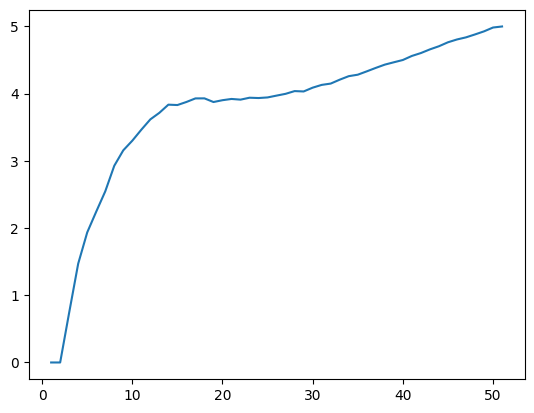

In [6]:
days = np.arange(1, 52)
plt.plot(days, ltv)
plt.show()

На графике выше представлен LTV пользователя в динамике. Воспользуемся методами машинного обучения для прогнозирования LTV на полгода и оценим наши результаты. Функция напоминает логарифмический рост, поэтому будем пытаться апроксимировать ее с помощью логарифмической регрессии. 

In [7]:
ltv_values = np.array(ltv) 
log_days = np.log(days).reshape(-1, 1)
model = LinearRegression()
model.fit(log_days, ltv_values)
ltv_predicted = model.predict(log_days)
forecast_mse = root_mean_squared_error(ltv_values, ltv_predicted)
print(forecast_mse)


0.26996153878755685


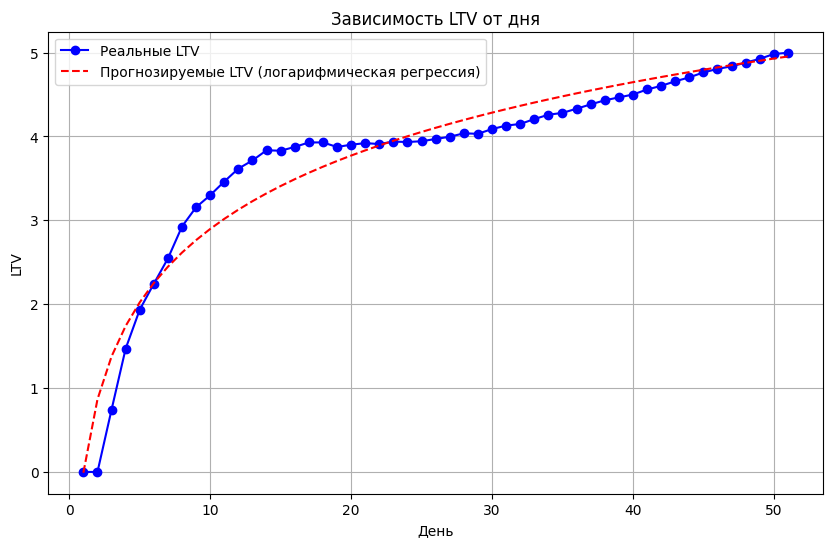

In [8]:

plt.figure(figsize=(10, 6))
plt.plot(days, ltv_values, label="Реальные LTV", color="blue", marker='o')
plt.plot(days, ltv_predicted, label="Прогнозируемые LTV (логарифмическая регрессия)", color="red", linestyle='--')
plt.title("Зависимость LTV от дня")
plt.xlabel("День")
plt.ylabel("LTV")
plt.legend()
plt.grid(True)
plt.show()



Заметим на графике, что логарифмическая регрессия довольно точно апроксимирует нашу функцию на тестовых данных, попробуем построить прогноз LTV на полгода.

In [9]:
future_days = np.arange(53, 233)
log_future_days = np.log(future_days).reshape(-1, 1)
future_ltv = model.predict(log_future_days)


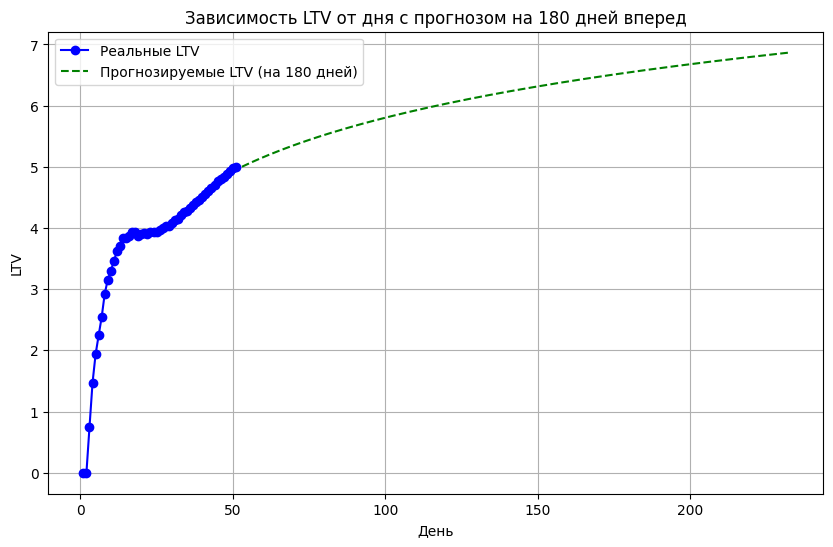

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(days, ltv_values, label = "Реальные LTV", color = "blue", marker = 'o')
plt.plot(future_days, future_ltv, label="Прогнозируемые LTV (на 180 дней)", color="green", linestyle='--')
plt.title("Зависимость LTV от дня с прогнозом на 180 дней вперед")
plt.xlabel("День")
plt.ylabel("LTV")
plt.legend()
plt.grid(True)
plt.show()

Итого, прогнозный LTV примерно стремится к 7$ за пол года. Осталось рассчитать ROMI

In [11]:
total_revenue = data.is_trial_period.sum() * 5
total_cost = len(data.user_id.unique()) * 6
ROMI = total_revenue / total_cost * 100
print("ROMI" ,ROMI, "%")

ROMI 83.46447514134174 %


Мы нашли ROMI за текущие 2 месяца, где у нас известно число пользователей. Предположим, что число пользователей растет примерно на 30000 пользователей в месяц, а из нашего прогноза с помощью регресии LTV возьмем как 5.5$. Для прогноза на пол года возьмем LTV = 6.5$

In [12]:
ROMI_next_month = (90000 * 5.5) / (90000 * 6) * 100
print("ROMI_month" ,ROMI_next_month, "%")
ROMI_six_months = (180000 * 6.5) / (180000 * 6) * 100
print("ROMI_six_months" , ROMI_six_months, "%")


ROMI_month 91.66666666666666 %
ROMI_six_months 108.33333333333333 %
